# Weather Type Classification
## Exploratory Data Analysis (EDA)

## About the Dataset
This dataset is synthetically generated to mimic real-world weather data for classification tasks.  
It includes various weather-related features and categorizes the weather into four main types:
Sunny, Rainy, Cloudy, and Snowy.

The dataset is designed to help learners and practitioners explore data preprocessing, outlier detection, and classification algorithms.

---

## EDA Objectives and Key Questions

In this notebook, we will perform an Exploratory Data Analysis (EDA) to understand the dataset and answer key questions such as:

1. **Data Overview**  
   - What is the structure, size, and types of features in the dataset?  
   - Are there any missing or duplicate values?

2. **Target Distribution**  
   - How are the weather types distributed?  
   - Is the dataset balanced across all classes?

3. **Categorical Features**
   - What are the most frequent values for categorical variables such as **Cloud Cover**, **Season**, and **Location**?  
   - How are these categorical features distributed overall?  
   - How do they relate to and vary with different **weather types**?

4. **Numerical Features**  
   - What are the distributions of numeric features like temperature, humidity, and wind speed?  
   - How do these features vary by weather type?


5. **Feature Relationships**  
   - What are the correlations between numeric features?  
   - How do pairs of features interact across different weather categories?

---

## Goal of This Notebook
The main goal is to gain insight into the weather dataset, understand patterns and relationships,  
and prepare the data for future steps such as feature selection and model building.

---

# Preprocessing

## Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [8]:
df = pd.read_csv('../data/weather_classification_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (13200, 11)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Dataset Overview

**This dataset contains 13,200 records (rows) and 11 features (columns).**
**It is a synthetic dataset created to simulate different weather conditions for classification tasks.**
**Each record represents a specific weather situation, described by a combination of numerical and categorical values that capture various atmospheric conditions at a given time and location.**

| Variable | Type | Description |
|-----------|------|-------------|
| Temperature | Numeric | Temperature in °C, ranging from extreme cold to extreme heat. |
| Humidity | Numeric | Humidity percentage, may include values above 100% (outliers). |
| Wind Speed | Numeric | Wind speed in km/h, includes unrealistically high values. |
| Precipitation (%) | Numeric | Precipitation percentage, may contain outliers. |
| Cloud Cover | Categorical | Descriptive level of cloud cover. |
| Atmospheric Pressure | Numeric | Atmospheric pressure in hPa, covering a wide range. |
| UV Index | Numeric | Indicates strength of ultraviolet radiation. |
| Season | Categorical | Season during which the data was recorded. |
| Visibility (km) | Numeric | Visibility in kilometers, may include very low or high values. |
| Location | Categorical | Type of location where the data was recorded. |
| Weather Type | Categorical | Target variable — indicates the type of weather. |

---

## Checking for missing values

In [10]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

## Checking for duplicated rows

In [11]:
df.duplicated().sum()

np.int64(0)

**Summary:**
- The dataset has 13,200 rows and 11 columns.
- There are no missing or duplicate values.
- It contains a mix of numerical (7) and categorical (4) features.
- Target variable: *Weather Type* (Rainy, Sunny, Cloudy, Snowy)

# Now we finished preprocessing let's start EDA

In [22]:
# Identify categorical and numerical columns
object_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

##  Categorical Features Analysis

###  Question 1
**How are the different weather types distributed in the dataset?**

###  Visualization
Using a **count plot** and a **pie chart**, we visualize the frequency and proportion of each weather type in the dataset.

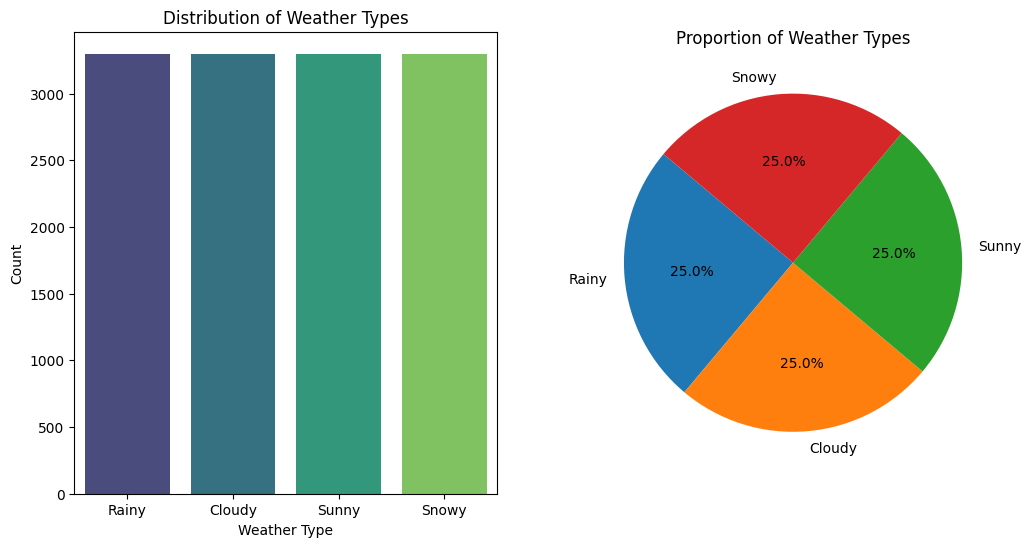

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [ ]:
# Visualize categorical variable distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Weather Type',palette='viridis')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')

# Visualize proportion of each category
plt.subplot(1, 2, 2)
plt.pie(df['Weather Type'].value_counts(), labels=df['Weather Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Weather Types')
plt.show()
print(df['Weather Type'].value_counts())

####  Insights  
- Each weather category (**Rainy**, **Cloudy**, **Sunny**, **Snowy**) contains exactly **3300 samples**.  
- This means the dataset is **perfectly balanced**, with no class dominating the target variable.  
- A balanced dataset helps the model learn equally from all classes without bias, reducing the need for class weighting or resampling techniques.

---

###  Question 2
**What are the distributions and proportions of other categorical features in the dataset?**

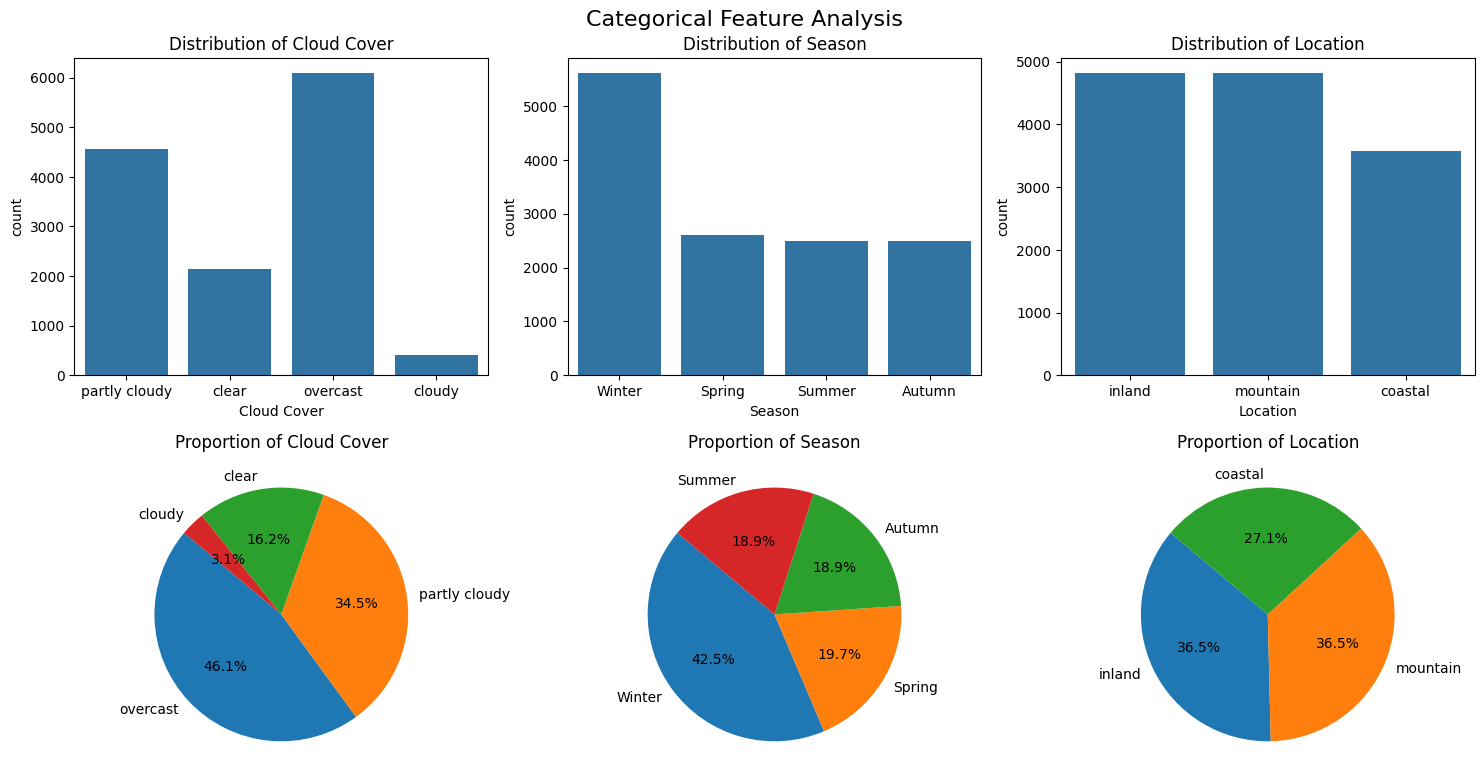

##########################################
Value counts for Cloud Cover:
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
##########################################
Value counts for Season:
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
##########################################
Value counts for Location:
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
##########################################


In [ ]:
# Visualize all categorical features
plt.figure(figsize=(15, 12))
plt.suptitle('Categorical Feature Analysis', fontsize=16)
for i,col in enumerate(object_cols[:-1]):
    # Distribution plot
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

    # Proportion plot
    plt.subplot(3,3,i+4)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of {col}')

plt.tight_layout()
plt.show()

# Print value counts for each categorical feature
print('##########################################')
for col in object_cols[:-1]:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())
    print('##########################################')

###  Insights from Categorical Features

After visualizing the categorical columns (`Cloud Cover`, `Season`, and `Location`), here’s what we can observe:

#### **1. Cloud Cover**
- The dataset is **dominated by "overcast"** conditions (≈46% of records).  
- "Partly cloudy" represents a moderate share (≈34%), while "clear" (≈16%) and "cloudy" (≈3%) are less frequent.  
- This suggests that most data points describe **cloudy or overcast** weather, which may affect model balance for certain weather types.

#### **2. Season**
- The distribution of seasons is **slightly imbalanced**:  
  - *Winter* has the largest share with **5,610 records (~42%)**.  
  - *Spring, Autumn,* and *Summer* are fairly close, each around **2,500–2,600 records (~19–20%)**.  
- This indicates **seasonal bias**, where winter conditions are more represented in the dataset.

#### **3. Location**
- The data is nearly balanced across locations:  
  - *Inland* → 4,816 records  
  - *Mountain* → 4,813 records  
  - *Coastal* → 3,571 records  
- While *coastal* locations are slightly underrepresented, the difference is small and unlikely to cause major bias.

#### **Summary**
Overall, the categorical features show:
- A **strong dominance** of cloudy/overcast weather conditions.  
- A **slight bias** toward the winter season.  
- **Reasonably balanced** location data.  

These insights are useful for preprocessing — especially for **encoding** and **class balancing** steps before training a classification model.

---


###  Question 3
**How do these features vary by weather type?**

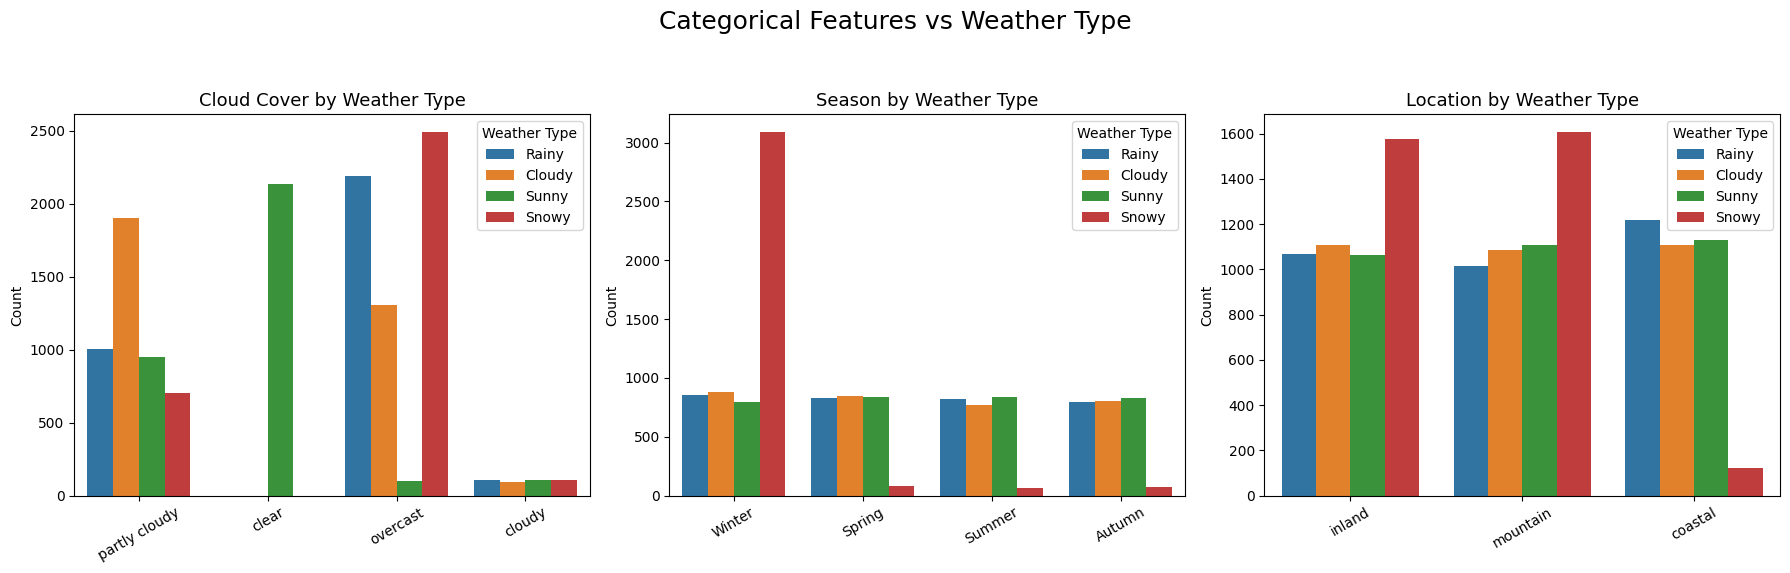

In [ ]:
plt.figure(figsize=(18, 14))
plt.suptitle('Categorical Features vs Weather Type', fontsize=18, y=1.02)

# Plot each categorical feature against the target variable
for i, col in enumerate(object_cols[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Weather Type')
    plt.title(f'{col} by Weather Type', fontsize=13)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    
plt.tight_layout()
plt.show()

###  Insights
#### Cloud Cover by Weather Type
- **Partly Cloudy:** mostly associated with **Cloudy** weather, while other types appear less frequently.  
- **Clear:** appears almost exclusively in **Sunny** weather.  
- **Overcast:** dominated by **Snowy**, followed by **Rainy** and **Cloudy**; **Sunny** is the least common.  
- **Cloudy:** very few samples across all weather types.

#### Season by Weather Type
- **Winter:** mostly **Snowy**, with other weather types being less frequent.  
- **Spring:** almost no **Snowy** records, while the other types are well balanced.  
- **Summer** and **Autumn:** similar to **Spring**, showing balanced distribution across Sunny, Rainy, and Cloudy weather types.

#### Location by Weather Type
- **Inland:** dominated by **Snowy** weather, while the rest are evenly distributed.  
- **Mountain:** similar pattern to inland — **Snowy** is most common.  
- **Coastal:** **Snowy** weather is rare, and other types (Sunny, Cloudy, Rainy) are more balanced.

#### Summary
Categorical features such as **Cloud Cover**, **Season**, and **Location** show meaningful relationships with the weather type.  
These relationships reflect realistic environmental behavior and can help the model distinguish between weather categories effectively.

---


##  Numerical Features Analysis

### Question 4
**What are the distributions and patterns of numerical features in the dataset?**

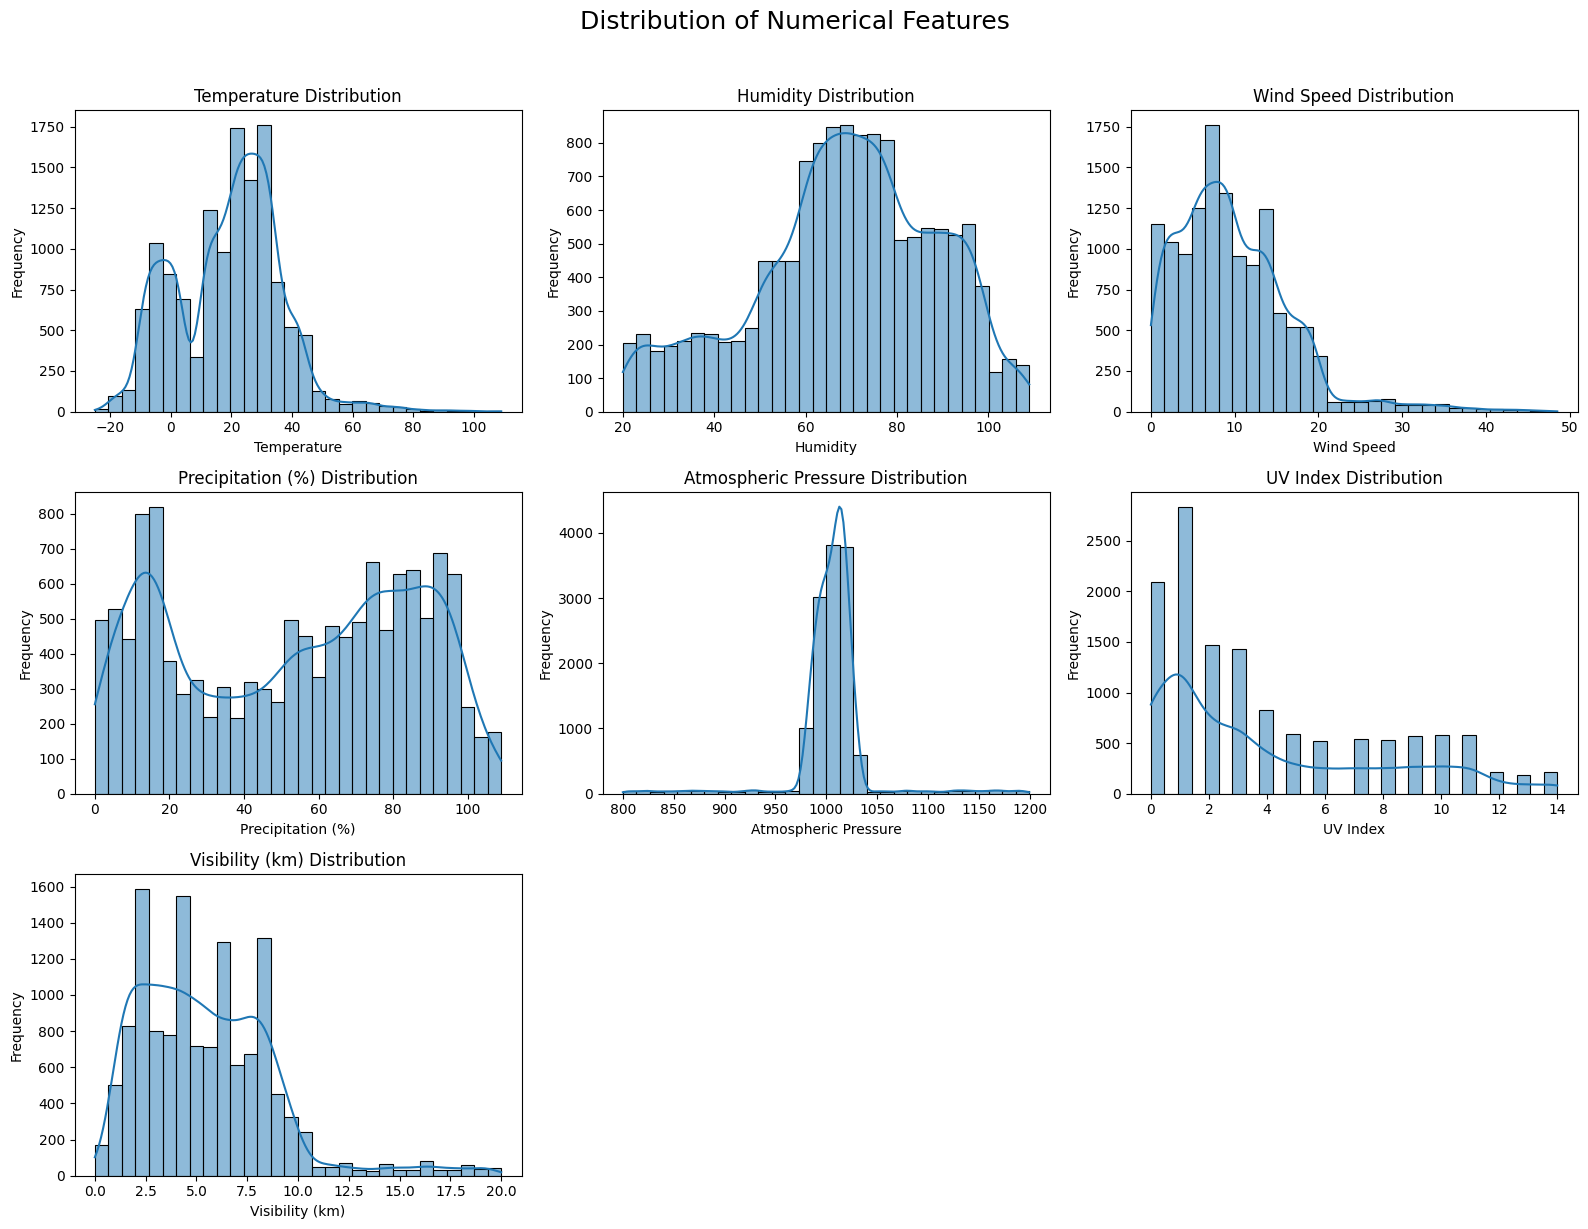

In [ ]:
plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=18, y=1.02)
# Plot distribution of each numerical feature
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Insights
- These histograms reveal the **distribution shape**, **data ranges**, and **potential outliers**.  
- Some features like *Humidity* and *Precipitation (%)* show mild skewness, while others like *Temperature* and *Pressure* appear roughly normal.  
- Understanding these distributions helps identify normalization or transformation needs before model training.

---


### Question 5
**How do these features vary by weather type?**

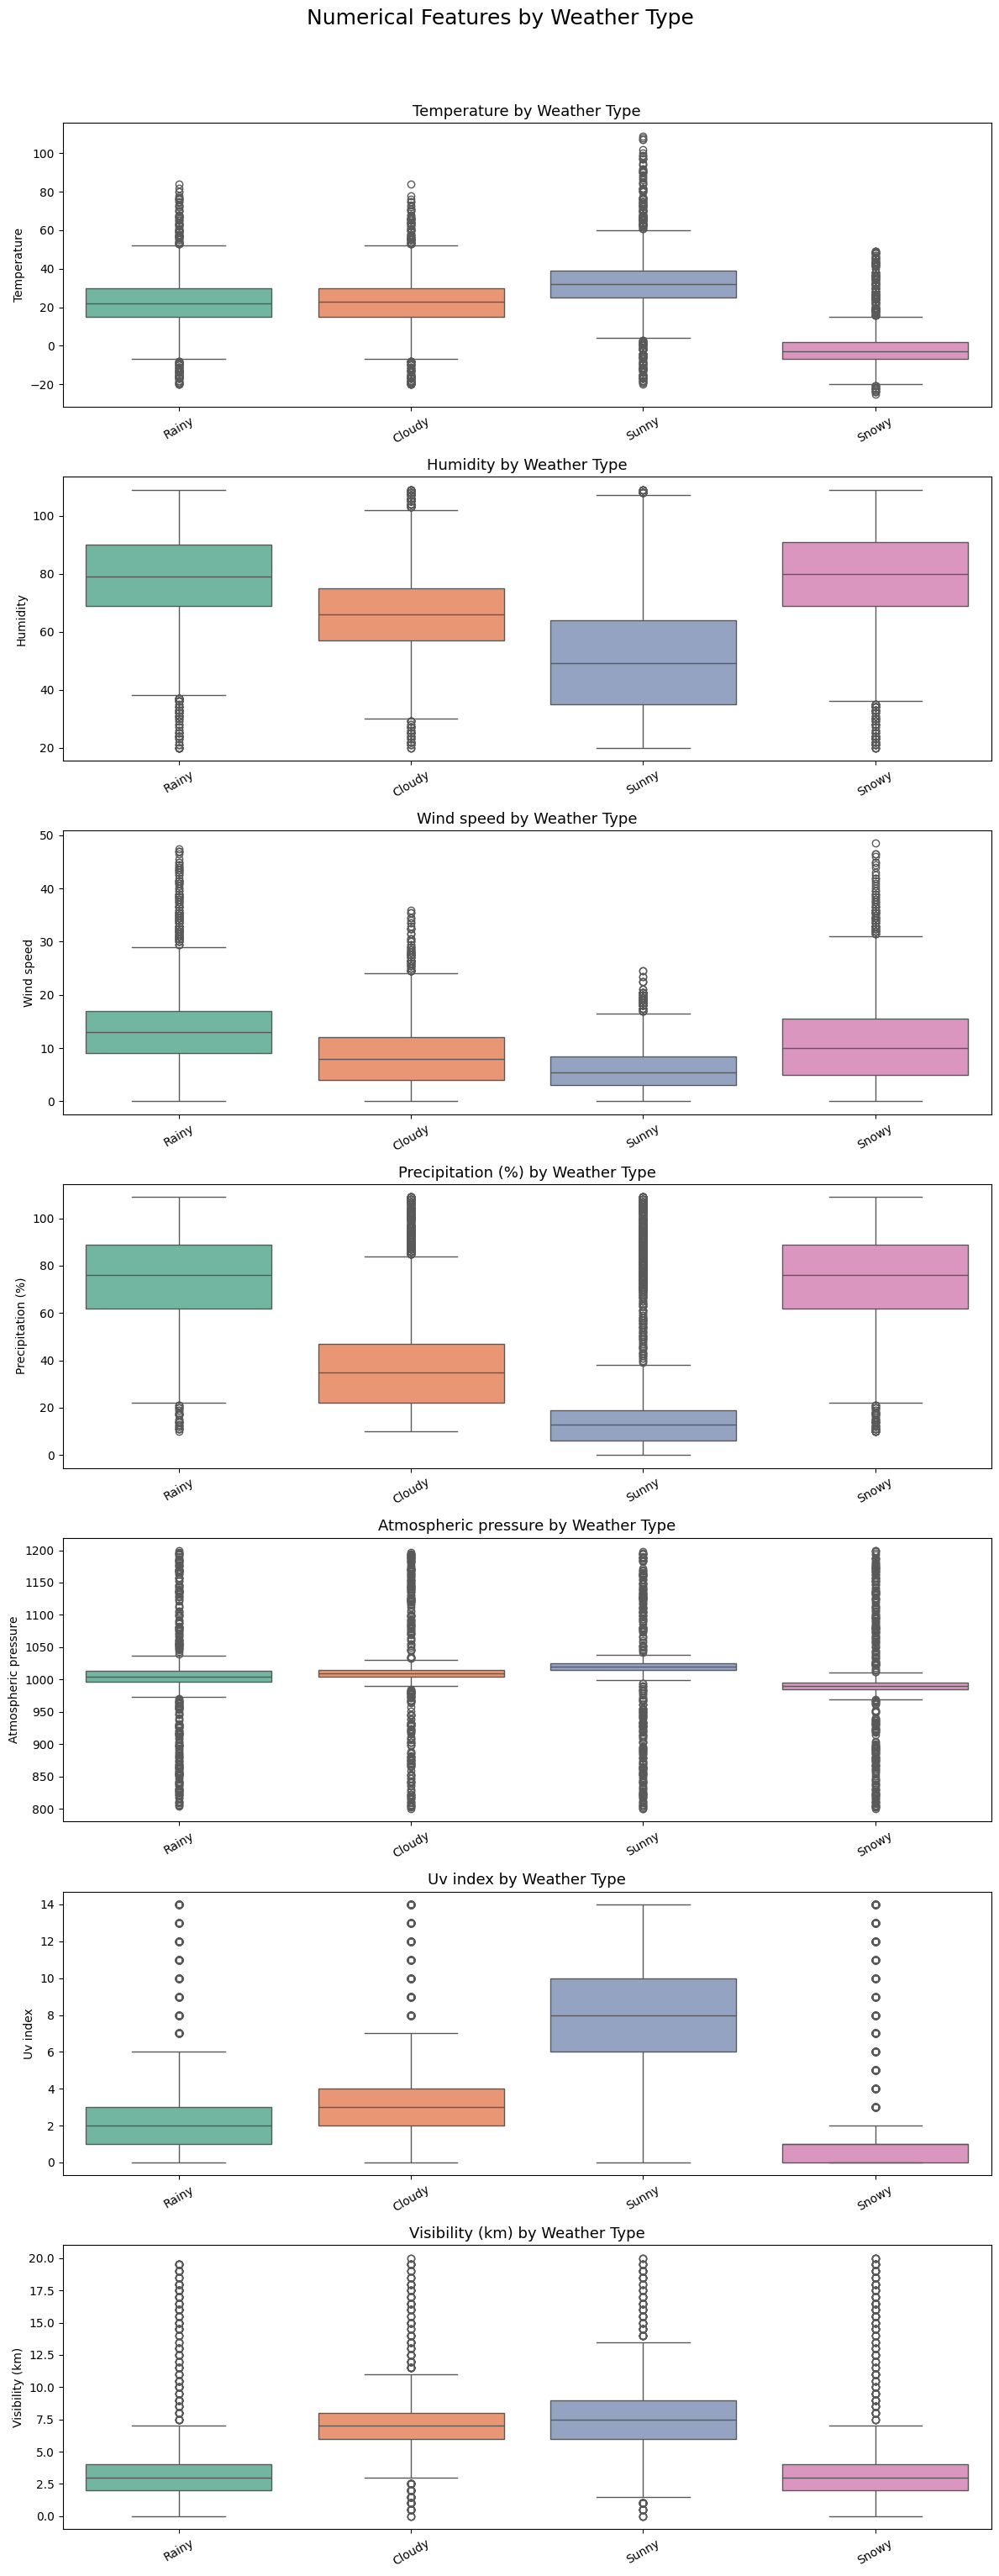

In [ ]:
plt.figure(figsize=(12, 30))
plt.suptitle('Numerical Features by Weather Type', fontsize=18, y=1.02)

# Plot numerical features against the target variable
for i, col in enumerate(numerical_cols):
    plt.subplot(7,1, i + 1)
    sns.boxplot(data=df, x='Weather Type', y=col, palette='Set2')
    plt.title(f'{col.capitalize()} by Weather Type', fontsize=13)
    plt.xlabel('')
    plt.ylabel(col.capitalize())
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


### Insights
#### Temperature by Weather Type
- **Sunny:** highest temperature range.  
- **Snowy:** lowest temperatures overall.  
#### Humidity by Weather Type
- **Rainy** and **Cloudy** show higher humidity.  
- **Sunny:** lowest humidity levels.  
#### Wind Speed by Weather Type
- **Rainy** and **Snowy:** slightly higher wind speeds.  
- **Sunny:** generally calmer conditions.  
#### Precipitation (%) by Weather Type
- **Rainy** and **Snowy:** show the highest precipitation.  
- **Sunny:** lowest.  
- **Cloudy** is moderate.  
#### Atmospheric Pressure by Weather Type
- **Sunny** and **Snowy:** generally higher pressure.  
- **Rainy:** lower pressure conditions.  
#
#### UV Index by Weather Type
- **Sunny:** strongest UV exposure.  
- **Snowy:** is the lowest.  
#### Visibility (km) by Weather Type
- **Sunny:** best visibility.  
- **Cloudy:** moderate.  
- **Rainy** and **Snowy:** poor visibility.

#### Summary
Numerical features demonstrate distinct patterns across weather categories —  
these differences are highly informative for classification models, helping them distinguish between **Sunny**, **Rainy**, **Cloudy**, and **Snowy** conditions effectively.

---


## Feature Relationships

### Question 6
**What are the correlations between numerical features, and how do pairs of features interact across different weather categories?**


### Visualization 1 — Correlation Heatmap

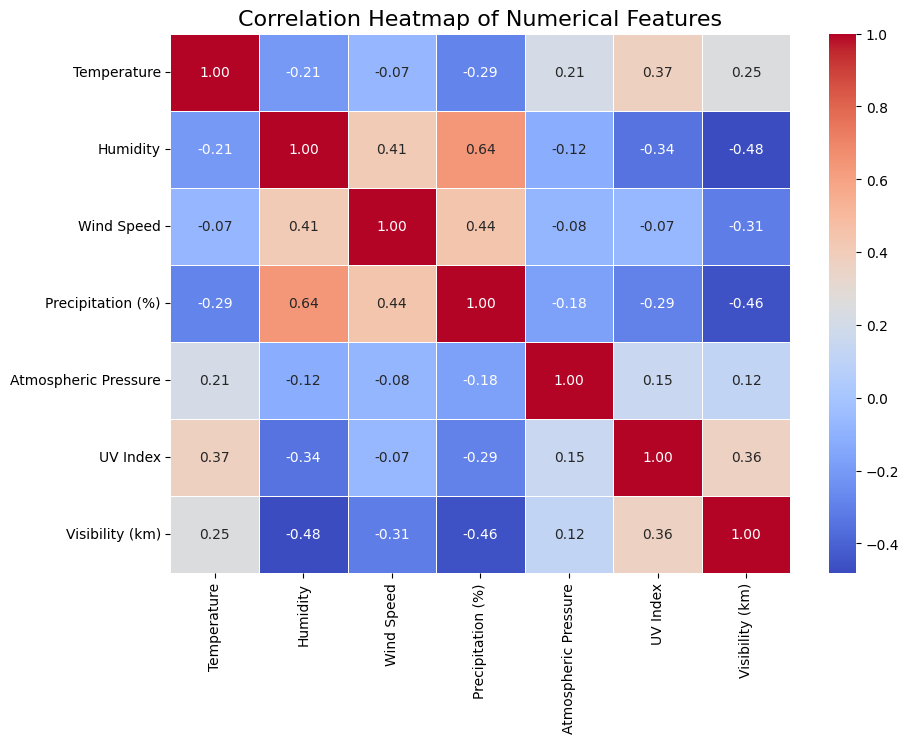

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 7))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

### Insights from Correlation Heatmap
- **Temperature** shows a **negative correlation with Humidity** and **positive correlation with UV Index and Visibility**, which makes sense for sunny conditions.  
- **Precipitation (%)** correlates **positively with Humidity** and **negatively with Visibility**, reflecting real-world weather patterns.  
- **Atmospheric Pressure** has a **mild negative correlation** with **Humidity and Precipitation**, indicating low pressure systems often cause rain or snow.  
- **Wind Speed** and **UV Index** have weak correlations with most other features — suggesting independent variation.  
- Overall, correlations are logical and indicate no extreme multicollinearity among variables.

---

### Question 7
**How do pairs of features interact across different weather categories?**


### Visualization 2 — Pairwise Relationships (Pairplot)

<Figure size 1000x800 with 0 Axes>

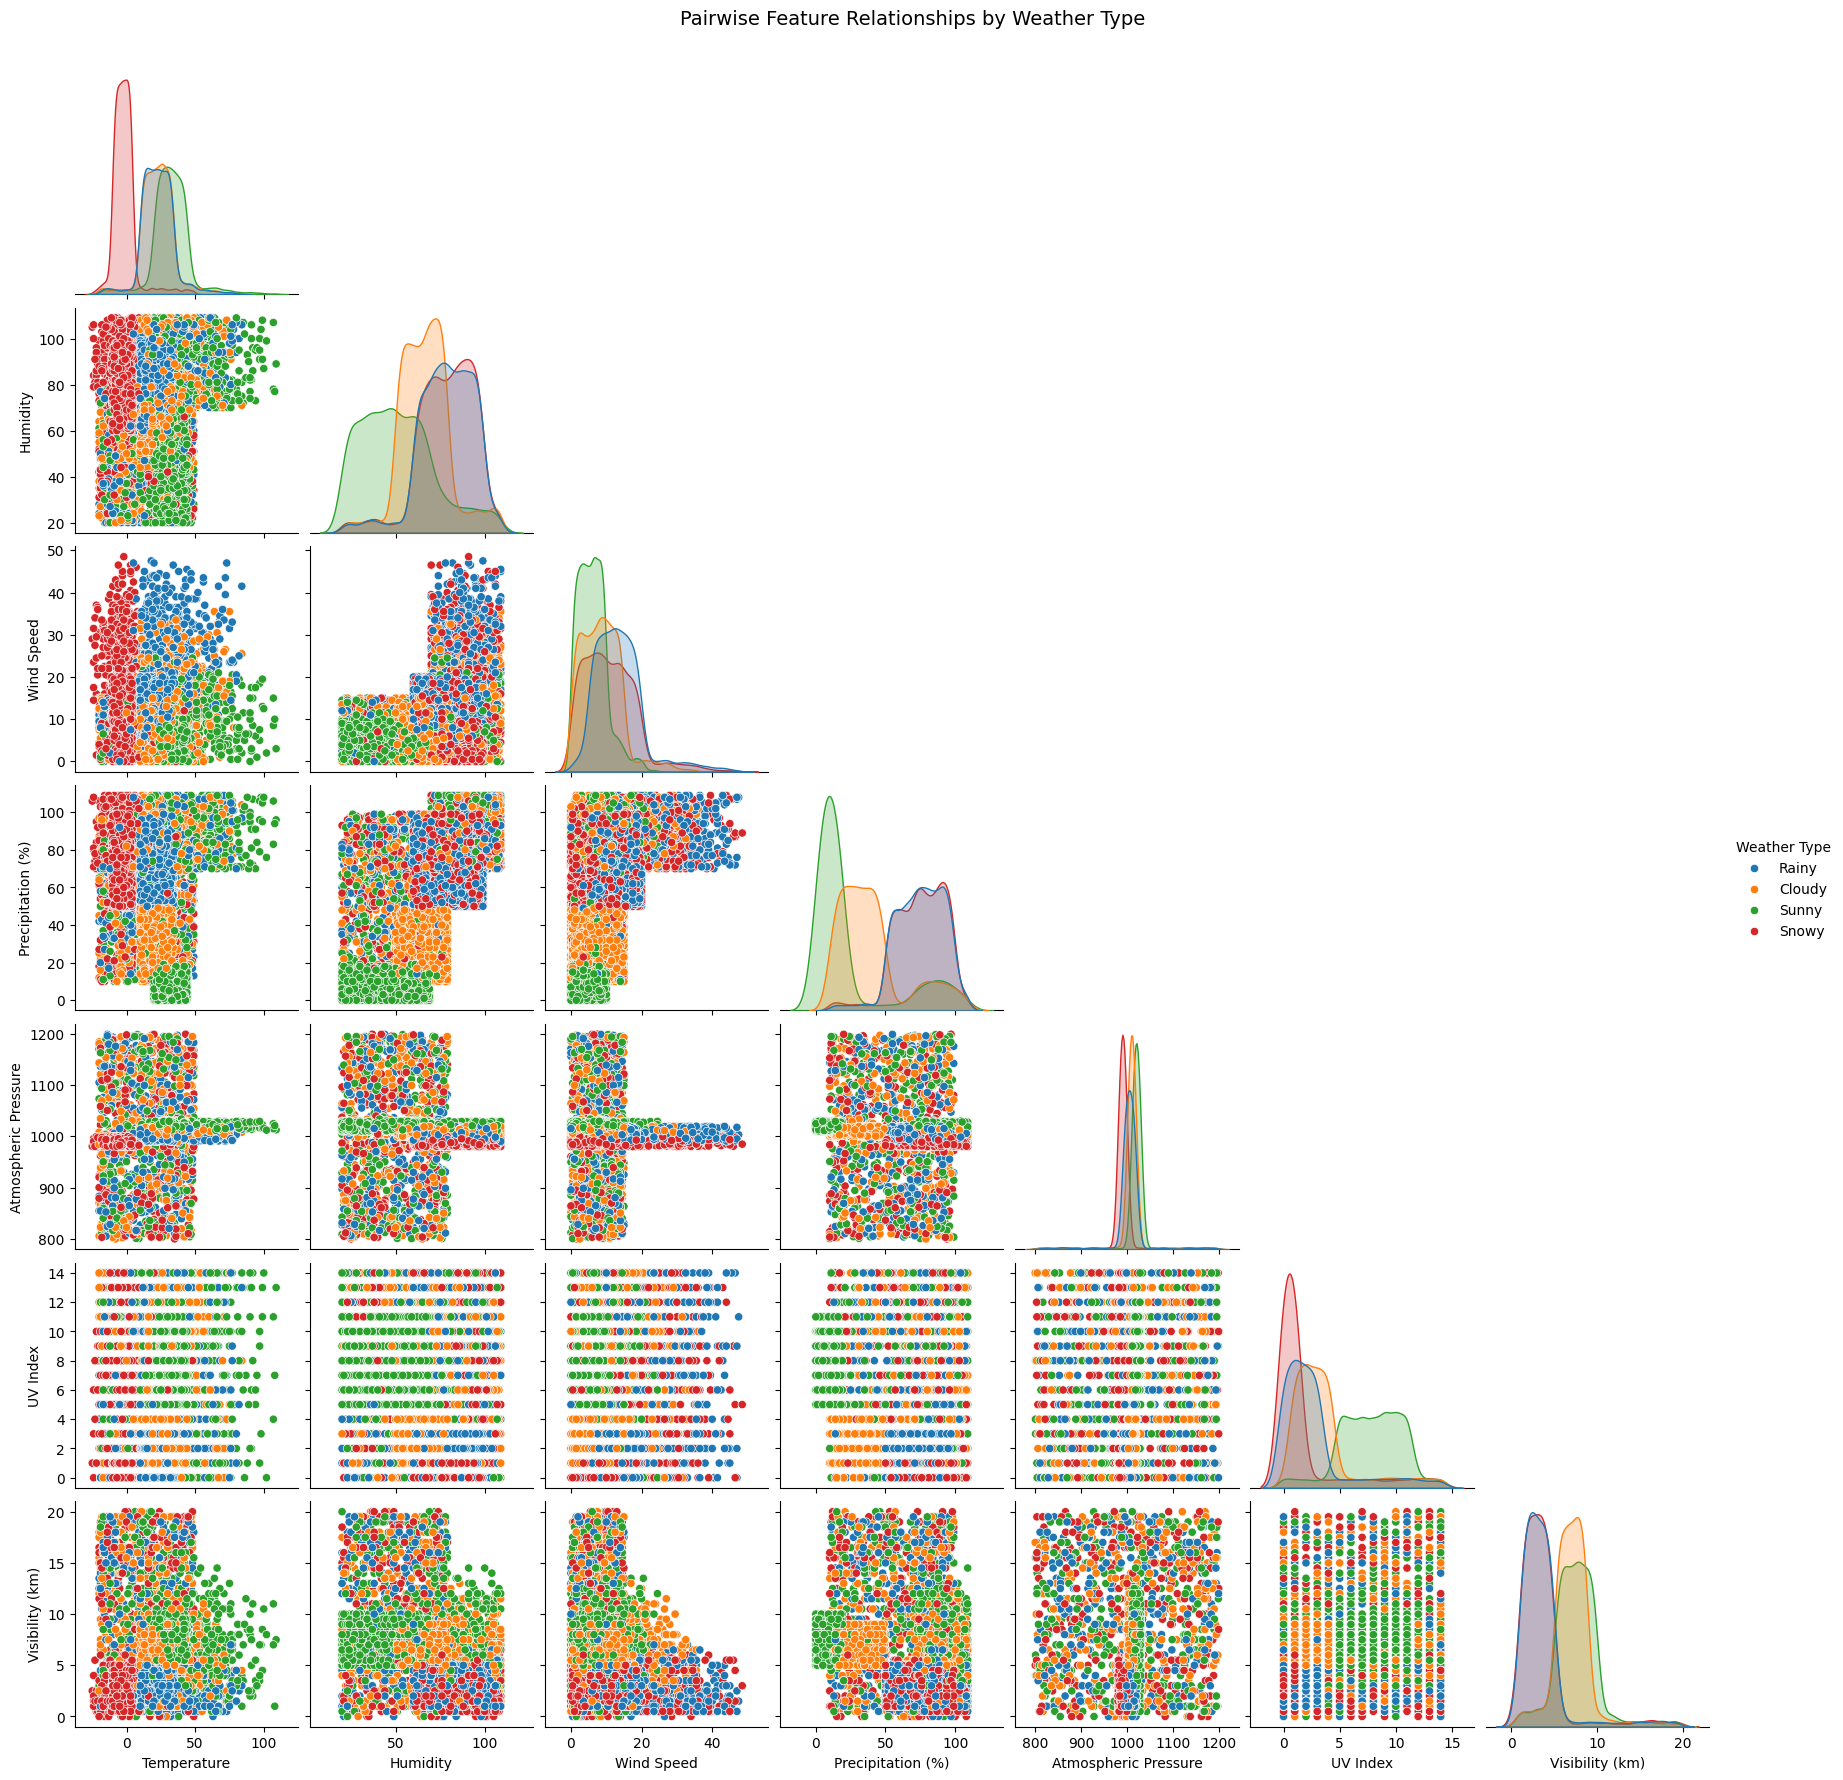

In [ ]:
# Pairplot for numerical features colored by target variable
plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=numerical_cols, hue='Weather Type', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Feature Relationships by Weather Type', y=1.02, fontsize=14)
plt.show()

### Insights – Pairwise Feature Relationships by Weather Type

- **Temperature vs Humidity:**  
  Shows a clear inverse relationship — **Sunny** weather points have **high temperature** and **low humidity**,  
  while **Rainy** and **Cloudy** show **high humidity** and **lower temperatures**.

- **Temperature vs Wind Speed:**  
  **Sunny** and **Cloudy** weathers cluster around **moderate wind speeds**,  
  while **Rainy** and **Snowy** conditions show **higher variation** in wind speeds.

- **Precipitation (%) vs Humidity:**  
  Strong **positive correlation**, especially in **Rainy** and **Snowy** categories —  
  makes sense physically since more humidity usually leads to precipitation.

- **Visibility (km) vs Humidity / Precipitation:**  
  As **humidity** and **precipitation** increase, **visibility decreases**,  
  particularly in **Rainy** and **Snowy** cases.

- **UV Index & Temperature:**  
  **Sunny** days have **high temperature** and **high UV index**,  
  while **Snowy** and **Cloudy** are much lower on both.

---

###  Summary
The pairplot clearly highlights that the dataset’s numerical features are **well-separated across weather types**,  
especially in **Temperature**, **Humidity**, and **Precipitation**,  
which makes them **strong predictors** for classification models.

---


#  Final Summary – Exploratory Data Analysis (EDA)

##  Dataset Overview
- The dataset contains **13,200 rows** and **11 columns** (7 numerical, 4 categorical).  
- It is **synthetic weather data** designed for classification tasks.  
- There are **no missing or duplicate values**.  
- The **target variable** (*Weather Type*) includes four balanced classes: **Sunny**, **Rainy**, **Cloudy**, and **Snowy** — each with 3,300 samples.

---

##  Categorical Features
- **Cloud Cover:** Dominated by *overcast* and *partly cloudy* conditions; *clear* mostly linked to *Sunny* weather.  
- **Season:** *Winter* shows more *Snowy* cases, while *Spring*, *Summer*, and *Autumn* are well balanced across other types.  
- **Location:** *Inland* and *Mountain* mostly *Snowy*; *Coastal* has fewer *Snowy* and more balanced weather distribution.

*Categorical variables show clear and realistic patterns that align with weather logic (e.g., Snowy → Winter, Sunny → Clear).*

---

##  Numerical Features
- **Temperature:** Highest in *Sunny*, lowest in *Snowy*.  
- **Humidity:** Peaks in *Rainy* and *Cloudy*, lowest in *Sunny*.  
- **Wind Speed:** More variable in *Rainy* and *Snowy*.  
- **Precipitation (%):** Strongly related to *Rainy* and *Snowy* weather.  
- **Atmospheric Pressure:** Slightly lower in *Rainy* conditions.  
- **Visibility:** Best in *Sunny*, lowest in *Snowy* and *Rainy*.  
- **UV Index:** Strongest in *Sunny*, weakest in *Rainy* and *Snowy*.

 *Numerical features are well-separated between weather categories — especially Temperature, Humidity, and Precipitation.*

---

##  Feature Relationships
- **Temperature ↔ Humidity:** Negative correlation (hot days → dry air).  
- **Humidity ↔ Precipitation:** Strong positive correlation (more humidity → more rain/snow).  
- **Pressure ↔ Precipitation:** Negative correlation (low pressure → bad weather).  
- **Visibility ↔ Humidity/Precipitation:** Inverse relationship (fog, rain, or snow reduce visibility).  
- **Temperature ↔ UV Index:** Positive correlation (clear skies increase UV exposure).

 Correlations are logical and show **no extreme multicollinearity**, meaning all features provide independent information.

---

##  Overall Insights
- The dataset is **clean, balanced, and well-structured** for classification tasks.  
- **Categorical** and **numerical** variables both show meaningful separation across weather types.  
- **Feature relationships** mimic real meteorological behavior — improving model interpretability.  
- The data is ready for **feature engineering** and **machine learning model training**.

---

 **In short:**  
The EDA reveals a rich, consistent dataset with distinct patterns between **Sunny**, **Rainy**, **Cloudy**, and **Snowy** weather types —  
providing a strong foundation for predictive modeling.
